In [30]:
%pylab inline

import numpy as np
import pandas as pa
import theano as th
import lasagne as L
import matplotlib.pyplot as py

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [3]:
vitals = pa.read_csv(
    'Training_Dataset/id_time_vitals_train.csv',
    dtype={'ID': np.int32, 'TIME': np.int32, 'ICU': np.int32}
)
labs = pa.read_csv(
    'Training_Dataset/id_time_labs_train.csv',
    dtype={'ID': np.int32, 'TIME': np.int32}
)
ages = pa.read_csv(
    'Training_Dataset/id_age_train.csv',
    dtype={'ID': np.int32, 'AGE': np.int32}
)
labels = pa.read_csv(
    'Training_Dataset/id_label_train.csv',
    dtype={'ID': np.int32, 'LABEL': np.int32}
)

In [17]:
ids = np.asarray(ages['ID'])
numids = np.max(ids)+1

# numfolds = 5
# folds = np.random.randint(0, numfolds-1, np.max(ids)+1)

avitals = [[] for i in xrange(numids)]
alabs = [[] for i in xrange(numids)]
atime = [[] for i in xrange(numids)]
aicu = [[] for i in xrange(numids)]
aages = [[] for i in xrange(numids)]
alabels = [[] for i in xrange(numids)]

qages = [0 for i in xrange(numids)]
qlabels = [0 for i in xrange(numids)]

for row in ages.iterrows():
    qages[row[1]['ID'].astype(np.int32)] = row[1]['AGE'].astype(np.int32)
for row in labels.iterrows():
    qlabels[row[1]['ID'].astype(np.int32)] = row[1]['LABEL'].astype(np.int32)


for i, row in enumerate(vitals.iterrows()):
    id = row[1]['ID'].astype(np.int32)
    avitals[id].append(np.asarray(row[1][2:]))
    atime[id].append(row[1]['TIME'].astype(np.int32))
    aicu[id].append(row[1]['ICU'].astype(np.int32))
    aages[id].append(qages[id])
    alabels[id].append(qlabels[id])
    if i >= 5000:
        break

for i, row in enumerate(labs.iterrows()):
    id = row[1]['ID'].astype(np.int32)
    alabs[id].append(np.asarray(row[1][2:]))
    if i >= 5000:
        break

In [11]:
a = [1, 2, 3]
b = [4, 5]
print a+b

[1, 2, 3, 4, 5]


In [23]:
afeats = [[] for i in xrange(numids)]

for id in ids:
    bvitals = avitals[id]
    blabs = alabs[id]
    bages = aages[id]
    
    numtimes = len(bvitals)
    for i in xrange(numtimes):
        bfeats = np.concatenate((bvitals[i],blabs[i],np.asarray([bages[i]])))
        bpres = [(0 if np.isnan(i) else 1) for i in bfeats]
        bfeats = [(0 if np.isnan(i) else i) for i in bfeats]
        afeats[id].append(bfeats+bpres)

In [46]:
print vitals.columns
print labs.columns

Index([u'ID', u'TIME', u'V1', u'V2', u'V3', u'V4', u'V5', u'V6', u'ICU'], dtype='object')
Index([u'ID', u'TIME', u'L1', u'L2', u'L3', u'L4', u'L5', u'L6', u'L7', u'L8',
       u'L9', u'L10', u'L11', u'L12', u'L13', u'L14', u'L15', u'L16', u'L17',
       u'L18', u'L19', u'L20', u'L21', u'L22', u'L23', u'L24', u'L25'],
      dtype='object')


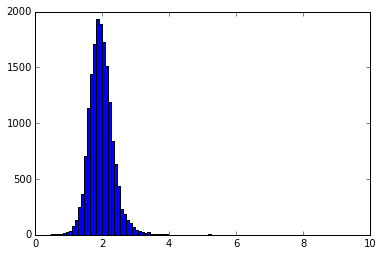

In [76]:
vals = np.asarray(labs['L25'])
vals = (vals[np.isnan(vals) == False])
_ = py.hist(vals, bins = 100)

In [87]:
print len(afeats[3][10])

66
